1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Anomaly Detection (also called outlier detection) is the process of identifying data points, events, or patterns that deviate significantly from normal behavior in a dataset. These anomalies often indicate errors, rare events, or important situations such as fraud, system failures, or security breaches.

1. Point Anomalies
A point anomaly is a single data instance that is clearly different from the rest of the data.Each data point is considered independently.If a value is far outside the normal range, it is flagged as anomalous.
Use Cases - Credit card fraud detection and Sensor fault detection

2. Contextual Anomalies
A contextual anomaly is a data point that is anomalous only in a specific context, such as time, location, or season.The same value may be normal in one context but abnormal in another.Contextual attributes (time, location) are crucial.

Use Cases - Network intrusion detection , Environmental monitoring

3. Collective Anomalies
A collective anomaly occurs when a group of related data points is anomalous, even if individual points seem normal.Individual values may not be unusual.The sequence or pattern as a whole is abnormal.

Use Cases - Fraud pattern detection , System performance monitoring


2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases ?

1. Isolation Forest (iForest)
Approach
- Tree-based, ensemble method
- Works by randomly selecting features and split values to isolate data points.
- Anomalies are isolated faster (with fewer splits) because they are rare and different.
- Does not rely on distance or density.
Key Characteristics of Isolation Forest is Efficient on large, high-dimensional datasets , Handles non-linear relationships and Assumes anomalies are few and different
it is use in Fraud detection (banking, insurance) , Network intrusion detection , Large-scale log analysis , High-dimensional datasets (e.g., cybersecurity data)

2. DBSCAN
(Density-Based Spatial Clustering of Applications with Noise)
Approach
- Density-based clustering algorithm
- Groups points into clusters based on neighborhood density
- Points in low-density regions are labeled as noise (anomalies)
Characteristics of DBSCAN is it Does not require number of clusters
Can find arbitrarily shaped clusters and Sensitive to parameter choice
it Suitable Use Cases is Spatial/geographical anomaly detection , Detecting outliers in low-dimensional data , Image processing and GPS trajectory analysis

3. Local Outlier Factor (LOF)
Approach
- Density-based anomaly detection
- Compares local density of a point with that of its neighbors
- A point is an outlier if it has significantly lower density than nearby points
 Key Characteristics of LOF
 Detects local anomalies well , Sensitive to neighborhood size (k) , Not ideal for very large datasets

 use case of LOF - Detecting anomalies in clustered data, Fraud detection with localized patternsMedical data analysis,
 Network traffic with local deviations


3.  What are the key components of a Time Series? Explain each with one example.

A time series is a sequence of observations recorded over time at regular intervals (hourly, daily, monthly, yearly, etc.). Time series data is commonly analyzed to understand patterns and make forecasts.

These key components of a time series are:
1. Trend - The trend represents the long-term movement or overall direction of the data over time (upward, downward, or stable).
Example - Annual sales of electric cars increasing steadily over several years → Upward trend
2. Seasonal Component - The seasonal component refers to repeating patterns that occur at fixed intervals due to seasonal factors such as weather, holidays, or events.
Example - Ice cream sales increasing every summer and decreasing every winter → Seasonality
3. Cyclical Component - The cyclical component consists of long-term oscillations that do not have a fixed period and are usually related to economic or business cycles.
Example - Unemployment rates rising during economic recessions and falling during economic booms → Cyclical variation
4. Irregular (Random/Noise) Component - The irregular component captures random, unpredictable fluctuations caused by unforeseen events.
Example - A sudden drop in airline bookings due to a natural disaster or pandemic → Irregular component


4.  Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

A time series is said to be stationary if its statistical properties remain constant over time. In other words, the behavior of the series does not depend on when it is observed.
A time series is stationary if:
- Mean is constant over time
- Variance is constant over time
- Autocovariance (correlation structure) depends only on the lag, not on time
Stationarity is Important -
- Many time series models (ARMA, ARIMA) assume stationarity
- Makes modeling, forecasting, and interpretation easier
- Ensures that relationships learned from past data remain valid

These are Testing for Stationarity.
1. Visual Inspection - Time plot: Look for trends or changing variance,Rolling mean and variance: If they change over time → non-stationary
2. Augmented Dickey–Fuller (ADF) Test - Null hypothesis (H0): Series has a unit root (non-stationary).Alternative hypothesis (H1): Series is stationary.
3. If p-value < 0.05, reject H0 → stationary

3. KPSS Test
Null hypothesis (H0): Series is stationary
Alternative hypothesis (H1): Series is non-stationary
If p-value < 0.05, reject H0 → non-stationary

Transforming a Non-Stationary Series into a Stationary One
1. Differencing
2. Transformation (Stabilizing Variance)
3. Detrending
4. Seasonal Adjustment


5.  Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Below is a clear differentiation of AR, MA, ARIMA, SARIMA, and SARIMAX models focusing on their structure and applications, suitable for exams and practical understanding.

1. AR (AutoRegressive) Model
Structure - Current value depends on its own past values. Order p indicates number of lagged terms
Application - Used when data shows momentum or persistence, Requires stationary time series
2. MA (Moving Average) Model
Structure - Current value depends on past error terms , Order q indicates number of lagged errors
Application - Useful for modeling short-term shocks , Requires stationary time series
3. ARIMA (AutoRegressive Integrated Moving Average)
Structure - Combines AR + MA . I (d) represents differencing to achieve stationarity
Application - Handles non-stationary data with trend , Most widely used general-purpose time series model
4. SARIMA (Seasonal ARIMA)
Structure - Extends ARIMA to model seasonality .Includes seasonal terms- SARIMA (p,d,q)(P,D,Q)
Where - S = Seasonal period (e.g., 12 for monthly data)
5. SARIMAX (Seasonal ARIMA with Exogenous Variables)
Structure - SARIMA + external (exogenous) variables , Incorporates additional predictors - SARIMAX(P,d,q)(P,D,Q)8+ Xt


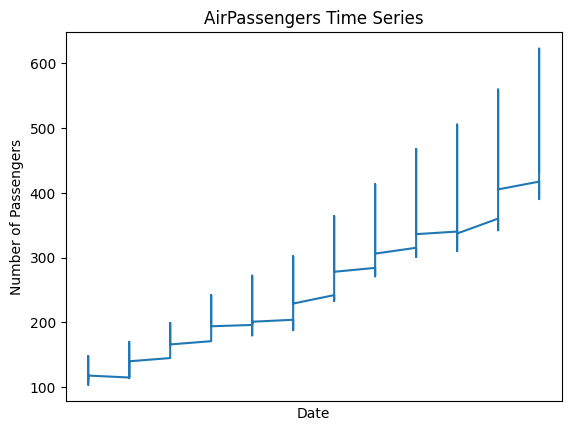

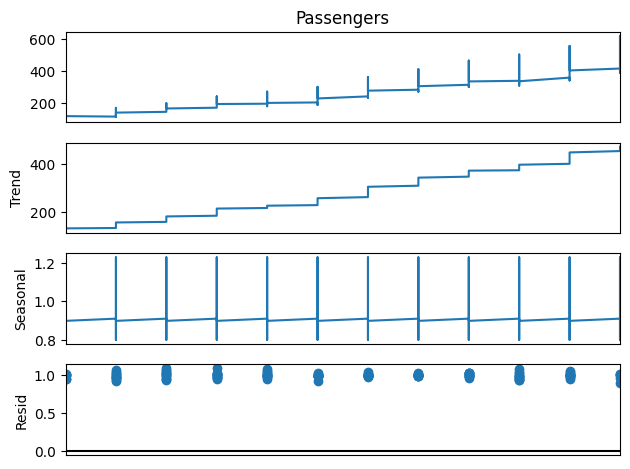

In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

# Load the dataset
# If using the uploaded file path
# df = pd.read_csv("/mnt/data/AirPassengers.csv")

data = get_rdataset("AirPassengers", "datasets")
df = data.data

# Rename columns for clarity (common format)
df.columns = ["Month", "Passengers"]

# Convert Month to datetime and set as index for time series analysis
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# Plot original time series
plt.figure()
plt.plot(df["Passengers"])
plt.title("AirPassengers Time Series")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(
    df["Passengers"],
    model="multiplicative",   # AirPassengers has multiplicative seasonality
    period=12                 # Monthly data
)

# Plot decomposition
decomposition.plot()
plt.show()

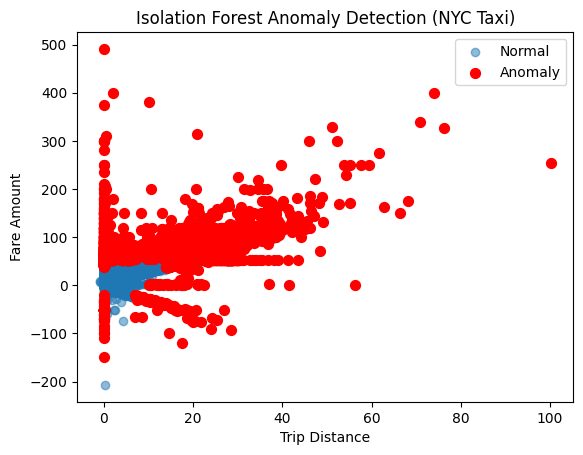

In [19]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# --------------------------------------
# Load NYC Taxi Fare dataset from CSV
# --------------------------------------
# Correct path to the CSV file
csv_path = "/content/NYC_taxi_fare_data.csv"

df = pd.read_csv(csv_path)

# --------------------------------------
# Select numerical features
# --------------------------------------
data = df[["fare_amount", "trip_distance"]].dropna()

# --------------------------------------
# Feature Scaling
# --------------------------------------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# --------------------------------------
# Apply Isolation Forest
# --------------------------------------
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.02,   # 2% anomalies
    random_state=42
)

data["anomaly"] = iso_forest.fit_predict(scaled_data)

# anomaly = -1 (outlier), 1 (normal)
anomalies = data[data["anomaly"] == -1]
normal = data[data["anomaly"] == 1]

# --------------------------------------
# Visualization (2D Scatter Plot)
# --------------------------------------
plt.figure()
plt.scatter(normal["trip_distance"], normal["fare_amount"], label="Normal", alpha=0.5)
plt.scatter(anomalies["trip_distance"], anomalies["fare_amount"], label="Anomaly", color='red', s=50)

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest Anomaly Detection (NYC Taxi)")
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


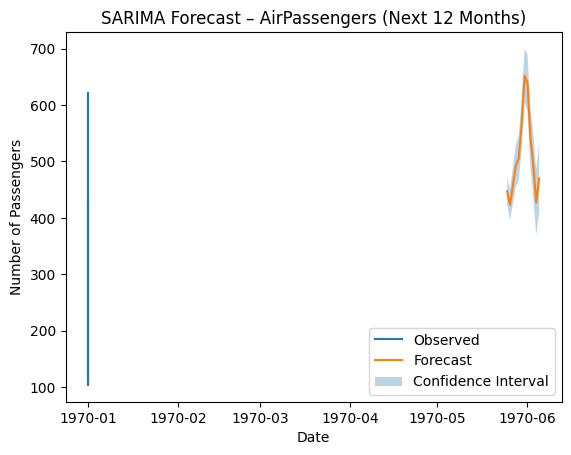

In [16]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# --------------------------------------
# Load dataset
# --------------------------------------
# df = pd.read_csv("/mnt/data/AirPassengers.csv") # Original line causing error
data = get_rdataset("AirPassengers", "datasets")
df = data.data

# Rename columns for clarity (common format)
df.columns = ["Month", "Passengers"]

# Convert Month to datetime and set as index for time series analysis
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)

# --------------------------------------
# Train SARIMA model
# (p,d,q)(P,D,Q,s)
# --------------------------------------
model = SARIMAX(
    df["Passengers"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

# --------------------------------------
# Forecast next 12 months
# --------------------------------------
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# --------------------------------------
# Visualization
# --------------------------------------
plt.figure()
plt.plot(df.index, df["Passengers"], label="Observed")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast")

plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    alpha=0.3,
    label="Confidence Interval"
)

plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.title("SARIMA Forecast – AirPassengers (Next 12 Months)")
plt.legend()
plt.show()

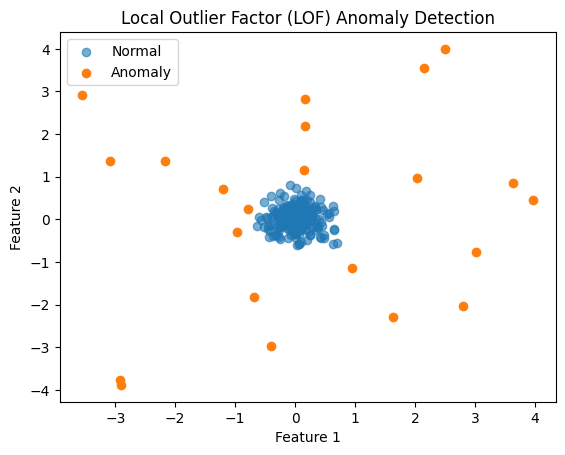

In [20]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# --------------------------------------
# Create a sample numerical dataset
# --------------------------------------
np.random.seed(42)

# Normal data points
X_normal = 0.3 * np.random.randn(200, 2)

# Anomalies
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

# Combine data
X = np.vstack([X_normal, X_outliers])

# --------------------------------------
# Apply Local Outlier Factor
# --------------------------------------
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.1
)

labels = lof.fit_predict(X)  # -1 = anomaly, 1 = normal

# Separate points
normal = X[labels == 1]
anomalies = X[labels == -1]

# --------------------------------------
# Visualization
# --------------------------------------
plt.figure()
plt.scatter(normal[:, 0], normal[:, 1], label="Normal", alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], label="Anomaly")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.legend()
plt.show()
